### Notes:
### This notebook provides a generic template to replicate the figures from the manuscript. The code here is used for the data from the RWW model simulations. 

In [1]:
# Import relevant libraries

import warnings
warnings.filterwarnings('ignore')

import os, sys, scipy.io, numpy as np, pandas as pd, seaborn as sns
import time
from matplotlib import pyplot as plt

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import random 

tvb_lib_dir = '/external/rprshnas01/kcni/hharita/Code/shreyVB/tvb-library'
tvb_dat_dir = '/external/rprshnas01/kcni/hharita/Code/shreyVB/tvb-data'

sys.path += [tvb_lib_dir,tvb_dat_dir]
from tvb.simulator.lab import *
from tvb.datatypes.time_series import TimeSeriesRegion

In [2]:
from numpy.polynomial.polynomial import polyfit

In [ ]:
# Use the list of HCP subject IDs provided and use the data from the 'Data' folder. 
# In the 'Scripts' folder, you can find the relevant code to convert the HCP dtseries data to pconn.nii data. 

In [4]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)


In [23]:
sub_list_1 = [100610, 103111, 139637, 144428, 158136, 182739, 102513, 102816, 107321, 107422, 108525, 112112, 121618, 129331]
sub_list_2 = [129634, 132118, 133625, 133827, 134829, 137936, 153227, 154936, 156334, 173435]
sub_list = np.concatenate((sub_list_1, sub_list_2))
sub_list.sort()

In [11]:
def load_wts(sub_id):
    
    _gg = np.loadtxt(Wts_Path + "/{0}_SC_wts.txt".format(sub_id))

    # Structural Connectivity
    HCP_SC1 = _gg[parcs][:,parcs] 
    HCP_SC1 = HCP_SC1 + HCP_SC1.T # --> Symmetric
    pre_laplachian_HCP_SC = HCP_SC1.copy()

    # Laplachian!

    HCP_SC = -np.diag((pre_laplachian_HCP_SC/np.linalg.norm(pre_laplachian_HCP_SC)).sum(0)) + pre_laplachian_HCP_SC/np.linalg.norm(pre_laplachian_HCP_SC)
    
    return pre_laplachian_HCP_SC, HCP_SC

In [ ]:
# Use the SC weights data found in the 'Data' folder for the 24 subjects to run the cells below. 

In [13]:
Wts_Path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/Sub_Specific_SC_Wts_2'


In [14]:
%%time
all_subs_pre_lap_SC = []
all_subs_HCP_SC = []

for i in range(len(sub_list)):
    pre_lap_SC, ss_SC = load_wts(sub_list[i])
    all_subs_pre_lap_SC.append(pre_lap_SC)
    all_subs_HCP_SC.append(ss_SC)

CPU times: user 2.58 s, sys: 2.63 s, total: 5.21 s
Wall time: 1.6 s


In [19]:
W_I = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
_lambda = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [6]:
# Replace with your specific path to pconn files:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [7]:
def load_FC(sub_id):
    
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_LR_Schaefer200_cifti_correlated.pconn.nii'.format(sub_id)
    pconn1RL = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_correlated.pconn.nii'.format(sub_id)
    pconn2LR = pconn_path + '{0}_rfMRI_REST2_LR_Schaefer200_cifti_correlated.pconn.nii'.format(sub_id)
    pconn2RL = pconn_path + '{0}_rfMRI_REST2_RL_Schaefer200_cifti_correlated.pconn.nii'.format(sub_id)
    
    _pconn_img1LR = nib.load(pconn1LR)
    _pconn_dat1LR = _pconn_img1LR.get_data()
    _pconn_dat1LR = _pconn_dat1LR/1

    _pconn_img1RL = nib.load(pconn1RL)
    _pconn_dat1RL = _pconn_img1RL.get_data()
    _pconn_dat1RL = _pconn_dat1RL/1

    _pconn_img2LR = nib.load(pconn2LR)
    _pconn_dat2LR = _pconn_img2LR.get_data()
    _pconn_dat2LR = _pconn_dat2LR/1

    _pconn_img2RL = nib.load(pconn2RL)
    _pconn_dat2RL = _pconn_img2RL.get_data()
    _pconn_dat2RL = _pconn_dat2RL/1
    
    _test_pconn = (_pconn_dat1LR + _pconn_dat1LR + _pconn_dat2LR + _pconn_dat2RL)/4
    
    return _pconn_dat1LR, _pconn_dat1RL, _pconn_dat2LR, _pconn_dat2RL, _test_pconn

In [10]:
%%time
all_subs_pconn1LR = []
all_subs_pconn1RL = []
all_subs_pconn2LR = []
all_subs_pconn2RL = []
all_subs_FC = []


for i in range(len(sub_list)):

    _1LR, _1RL, _2LR, _2RL, avg_ss_pconn = load_FC(sub_list[i])
    all_subs_pconn1LR.append(_1LR)
    all_subs_pconn1RL.append(_1RL)
    all_subs_pconn2LR.append(_2LR)
    all_subs_pconn2RL.append(_2RL)
    all_subs_FC.append(avg_ss_pconn)

CPU times: user 24.9 s, sys: 79.6 ms, total: 25 s
Wall time: 29.5 s


In [26]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)

# Labels
_label_file =  '/external/rprshnas01/kcni/hharita/Code/whobpyt/scratch/Schaefer200_7_Ntwx_labels.txt'

f = open(_label_file, "r")
q = f.read()
q = q.rsplit('\n')
# del q[-32:]
labels = q.copy()
labels = np.array(labels)
labels = labels[parcs]


In [27]:
# Simulations folder:
# Load the data from the data folder 

sims_folder = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/Simulations_dir/WW_sims_w_BOLD'


# Function to load trials 

def load_trials(_lambda, sub):
    
    _test_file = sims_folder + "/WW_BOLD_W_I_0.7_lambda_{0}_sub_{1}_20min_trial_1.txt".format(_lambda, sub)
           
    _test = np.loadtxt(_test_file)
        
    _test = np.array(_test)
    
    return _test

In [28]:
%%time

# 20 minute simlen trials for --> 1 trial x 24 subjects x 6 lambda values...

All_subs_all_trails = []

for k in range(len(sub_list)):
    subj_X_all_trials = []
    for i in range(len(_lambda)):
        _one_trial = load_trials(_lambda[i], sub_list[k])
        subj_X_all_trials.append(_one_trial)
    All_subs_all_trails.append(subj_X_all_trials)

CPU times: user 5.87 s, sys: 91.2 ms, total: 5.96 s
Wall time: 6.31 s


In [29]:
# Generate the plots for Fig. 3 B using the code below:

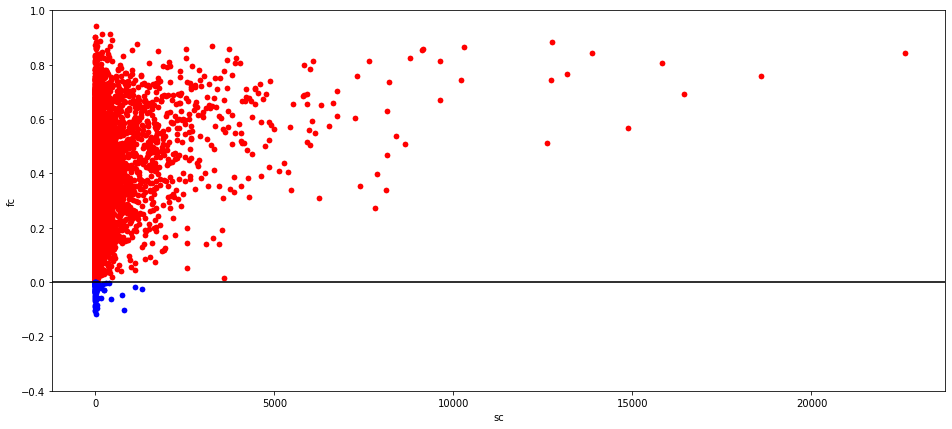

In [30]:
_fc_ = all_subs_FC[i].copy() # here i can be replaces with a ranodm number between for subjects 0-23 (python indexing). 
HCP_SC = all_subs_pre_lap_SC[i].copy()

np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1<0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df1 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1>0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df2 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

_df3 = pd.DataFrame([HCP_SC.ravel(),_fc_.ravel()],index=['sc', 'fc']).T
#_df3 = _df3[_df3.]


fig, ax = plt.subplots(figsize=(16, 7))
_df2.plot(kind='scatter', x='sc', y='fc',ax=ax,c='r')
_df1.plot(kind='scatter', x='sc', y='fc',ax=ax,c='b')
ax.axhline(0, color='black', lw=2, alpha=0.8)
ax.set_ylim(-0.4, 1.0)  # Set the ymin and ymax values
plt.grid(False)
plt.show()

In [31]:
_fc_ = All_subs_all_trails[i][0].copy()
HCP_SC = all_subs_pre_lap_SC[i].copy()

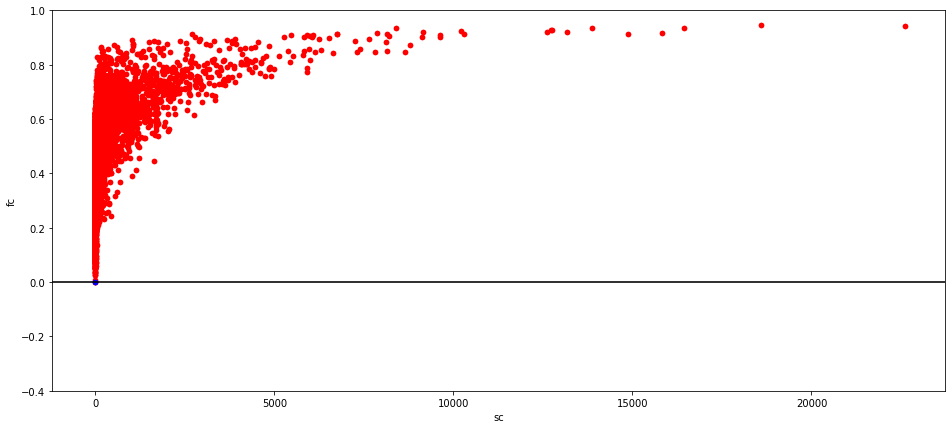

In [32]:
_fc_ = All_subs_all_trails[i][0].copy()
HCP_SC = all_subs_pre_lap_SC[i].copy()

np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1<0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df1 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1>0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df2 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

_df3 = pd.DataFrame([HCP_SC.ravel(),_fc_.ravel()],index=['sc', 'fc']).T
#_df3 = _df3[_df3.]


fig, ax = plt.subplots(figsize=(16, 7))
_df2.plot(kind='scatter', x='sc', y='fc',ax=ax,c='r')
_df1.plot(kind='scatter', x='sc', y='fc',ax=ax,c='b')
ax.axhline(0, color='black', lw=2, alpha=0.8)
ax.set_ylim(-0.4, 1.0)  # Set the ymin and ymax values
plt.grid(False)
plt.show()

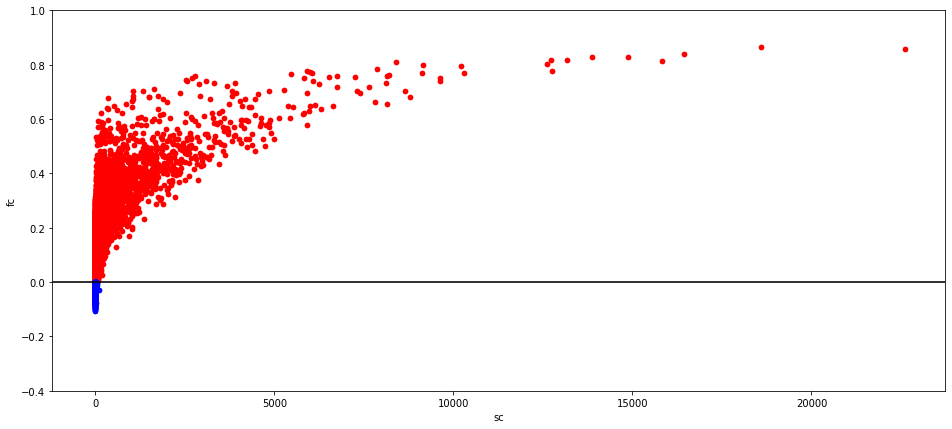

In [33]:
_fc_ = All_subs_all_trails[i][5].copy()
HCP_SC = all_subs_pre_lap_SC[i].copy()

np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1<0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df1 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


blah2 = HCP_SC.ravel()
blah1 = _fc_.ravel()
blah3 = blah1>0
blah4 = blah1[blah3]
blah5 = blah2[blah3]
_df2 = pd.DataFrame([blah4, blah5],index=['fc', 'sc']).T


np.fill_diagonal(HCP_SC,0)
np.fill_diagonal(_fc_,0)

_df3 = pd.DataFrame([HCP_SC.ravel(),_fc_.ravel()],index=['sc', 'fc']).T
#_df3 = _df3[_df3.]


fig, ax = plt.subplots(figsize=(16, 7))
_df2.plot(kind='scatter', x='sc', y='fc',ax=ax,c='r')
_df1.plot(kind='scatter', x='sc', y='fc',ax=ax,c='b')
ax.axhline(0, color='black', lw=2, alpha=0.8)
ax.set_ylim(-0.4, 1.0)  # Set the ymin and ymax values
plt.grid(False)
plt.show()

In [39]:
%%time
all_subs_corrs_all_lambda = []

for i in range(24):
    ss_corrs_lambda = []
    for j in range(6):
        ss_corrs_lambda.append(np.corrcoef(All_subs_all_trails[i][j][mask], all_subs_FC[i][mask])[0][1])
    all_subs_corrs_all_lambda.append(ss_corrs_lambda)

CPU times: user 102 ms, sys: 935 µs, total: 103 ms
Wall time: 102 ms


In [42]:
# std deviation and means for simulatin fit to empirical data

In [43]:
means = []
for i in range(len(all_subs_corrs_all_lambda[0])):
    _list = []
    sum1 = 0
    for j in range(len(all_subs_corrs_all_lambda)):
        sum1 += all_subs_corrs_all_lambda[j][i]
        _list.append(all_subs_corrs_all_lambda[j][i])
    avg = sum1 / len(all_subs_corrs_all_lambda)
    means.append(avg)
    print(np.std(_list))

print(means)

0.056767723706709135
0.05420123734942662
0.05287033959327225
0.05171836834877641
0.04894604227002616
0.04216640627593131
[0.23483777207551004, 0.2336165087644909, 0.24011346744923304, 0.2399413358419579, 0.24578309882528085, 0.23556118106779747]


In [44]:
sub_list = sub_list.tolist()

In [37]:
# all_subs_corrs_default2 = all_subs_corrs_default_lambda.copy()
# all_subs_corrs_max2 = all_subs_corrs_max_lambda.copy()


# del all_subs_corrs_default2[8]
# del all_subs_corrs_max2[8]

# print("At default lambda, avg pcc = ",np.mean(all_subs_corrs_default2), "+/-", np.std(all_subs_corrs_default2))

# print("At max lambda, avg pcc = ",np.mean(all_subs_corrs_max2), "+/-", np.std(all_subs_corrs_max2))

In [46]:
# number of negative correlations

In [47]:
%%time
all_subs_neg_corrs = []
for i in range(24):
    subs_specific_neg_corrs = []
    for j in range(6): # lambda range
        tmp = All_subs_all_trails[i][j].ravel().copy()
        neg_corrs = (tmp<0).sum()
        subs_specific_neg_corrs.append(neg_corrs)
    all_subs_neg_corrs.append(subs_specific_neg_corrs)

CPU times: user 29.8 ms, sys: 1.97 ms, total: 31.8 ms
Wall time: 30.4 ms


In [49]:
# average # of negative correlations at each _lambda value

averages = []
for i in range(len(all_subs_neg_corrs[0])):
    sum = 0
    for j in range(len(all_subs_neg_corrs)):
        sum += all_subs_neg_corrs[j][i]
    avg = sum / len(all_subs_neg_corrs)
    averages.append(avg)

print(averages)

[50.083333333333336, 94.41666666666667, 199.5, 344.25, 796.3333333333334, 2161.0]


In [52]:
sns.set_style('whitegrid')

In [54]:
# The effect of increasing the level of inhibtion (lambda) on the model fit to the empirical data and number of NCs.
# The type of inhibition can be changed to W_i, but be sure to load the correct data from the 'Data' folder.
# The resulting figure can be seen in the Figure 4 of the manuscript. 

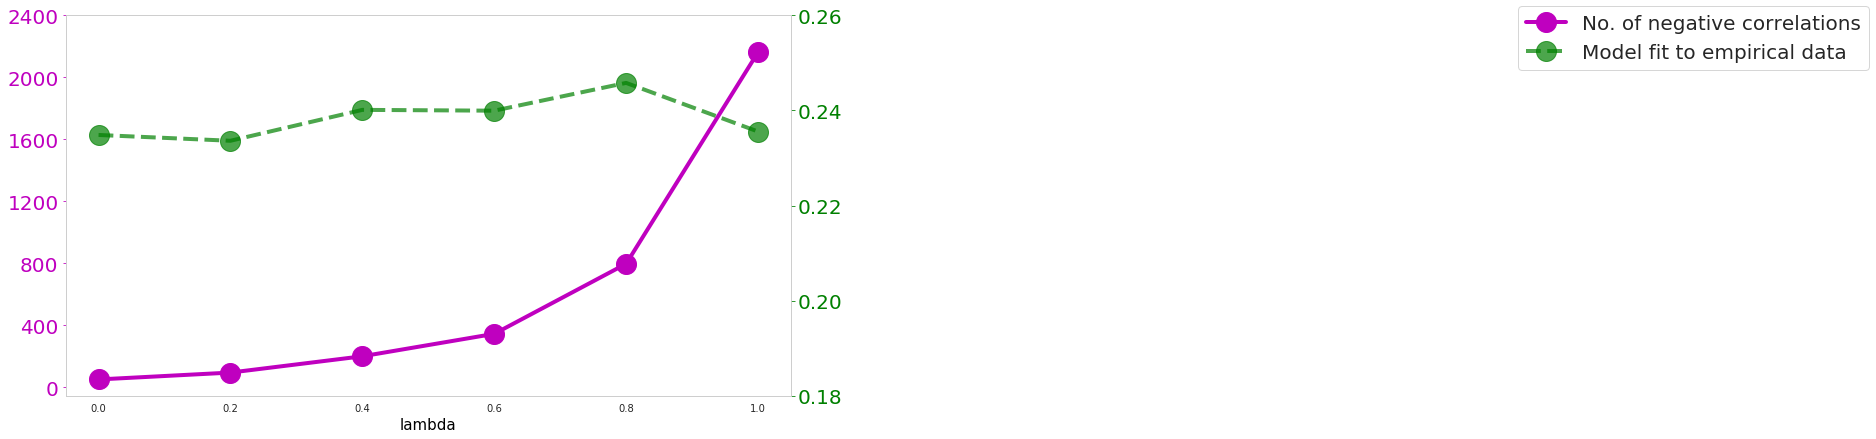

In [55]:
# 2 sets of data
# Data set 1 = averages (number of negative correlations with increasing lambda values)
# Data set 2 = means (pcc fits with increasing lambda values)

x = _lambda.copy()
y1 = averages.copy()
y2 = means.copy()

# create a figure and axis object
fig,ax1 = plt.subplots(figsize=(13,7))

# plot the first set of data on the primary y-axis
ax1.plot(x, y1, 'm.-', label='No. of negative correlations',markersize=40,linewidth=4)
ax1.set_xlabel('lambda',color='k',fontsize=15)
# ax1.set_ylabel('No. of negative correlations', color='k',fontsize=15)
ax1.tick_params('y', colors='m',labelsize=20)
ax1.set_yticks((np.arange(0, 2500, 400)))
# ax1.set_xticks(x)
# ax1.tick_params('x', colors='k',labelsize=25)
plt.grid(False)

# create a secondary axis object
ax2 = ax1.twinx()

# plot the second set of data on the secondary y-axis
ax2.plot(x, y2, 'g.--', label='Model fit to empirical data',markersize=40,alpha=0.7,linewidth=4)
# ax2.set_ylabel('Model fit to empirical data', color='k',fontsize=15)
ax2.set_yticks((0.18,0.20,0.22,0.24,0.26))
ax2.tick_params('y', colors='g',labelsize=20)

# add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(2.5, 1.05),fontsize=20)
plt.grid(False)
plt.show()


In [56]:
# Mean + Std. Dev for # of negative correlations

In [57]:
for i in range(6):
    tot = 0
    std_list = []
    for j in range(len(all_subs_neg_corrs)):
        tot = tot + all_subs_neg_corrs[j][i]
        std_list.append(all_subs_neg_corrs[j][i])
    tot = tot/24
    std_dev = np.std(std_list)
    print(_lambda[i])
    print(tot)
    print(std_dev)
    print("----")

0.0
50.083333333333336
92.76579679793386
----
0.2
94.41666666666667
163.41968380692563
----
0.4
199.5
286.87991099645393
----
0.6
344.25
385.95177267805536
----
0.8
796.3333333333334
860.7281155445597
----
1.0
2161.0
1859.0227719602217
----


#### Violin Plots

In [60]:
# Generate the Violin plots as seen in Figure 2 of the Manuscript. 

In [61]:
log_all_subs_neg_corrs = np.log10(all_subs_neg_corrs)

In [62]:
log_all_subs_neg_corrs[log_all_subs_neg_corrs==-np.inf] = 0

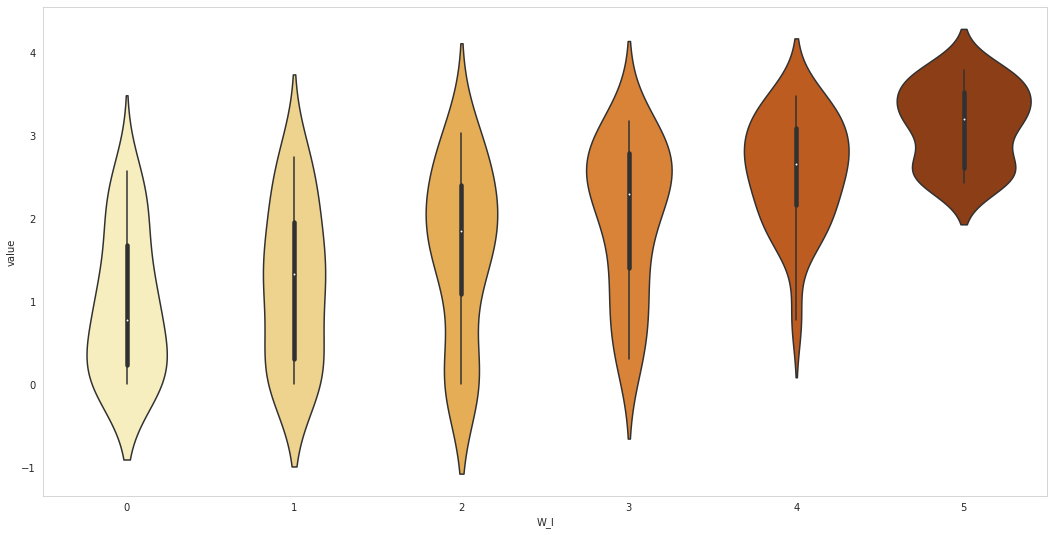

In [63]:
df = pd.DataFrame(log_all_subs_neg_corrs)

# Melt the DataFrame to a long format
df_melted = df.melt(var_name='W_I', value_name='value')

# Plot a violin plot
fig, ax = plt.subplots(figsize=(18,9))
sns.violinplot(data=df_melted, x='W_I', y='value', palette="YlOrBr")
plt.grid(False)

plt.show()

In [64]:
# Generate KDE plots as seen in Figure 3 of the Manuscript

In [65]:
sns.set_style('whitegrid')

CPU times: user 75.5 ms, sys: 8.4 ms, total: 83.9 ms
Wall time: 74.6 ms


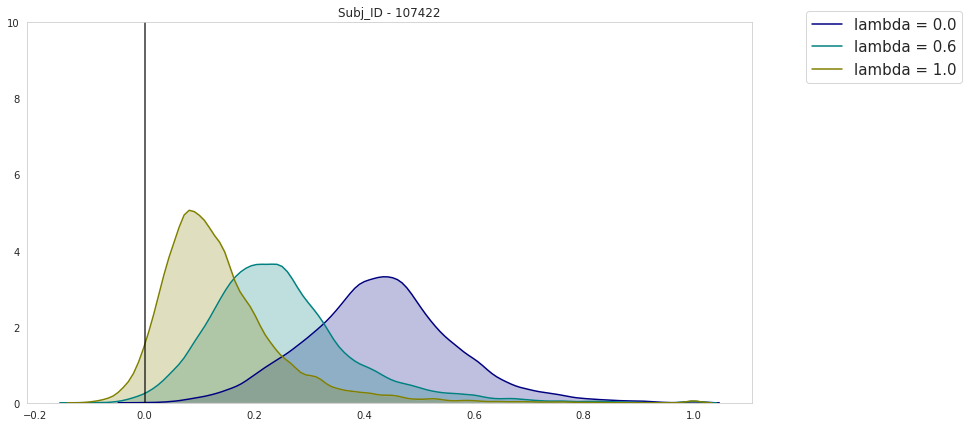

In [67]:
%%time

i = 5 # again, this 'i' value can be changed as it represents the subjects (range: 0-23 [python indexing])

_thresh = 0

# lambda = 0.0
_aa = All_subs_all_trails[i][0].copy()
_aa = _aa.ravel()
_aa2 = _aa[_aa!=1]
_aa3 = _aa2[_aa2<(_thresh*-1)]
_aa4 = _aa2[_aa2>_thresh]
_aa5 = np.concatenate((_aa3, _aa4)).tolist()

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

# lambda = 0.2
_bb = All_subs_all_trails[i][1].copy()
_bb = _bb.ravel()
_bb2 = _bb[_bb!=1]
_bb3 = _bb2[_bb2<(_thresh*-1)]
_bb4 = _bb2[_bb2>_thresh]
_bb5 = np.concatenate((_bb3, _bb4)).tolist()

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

# lambda = 0.6
_cc = All_subs_all_trails[i][3].copy()
_cc = _cc.ravel()
_cc2 = _cc[_cc!=1]
_cc3 = _cc2[_cc2<(_thresh*-1)]
_cc4 = _cc2[_cc2>_thresh]
_cc5 = np.concatenate((_cc3, _cc4)).tolist()

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

# lambda = 1.0
_dd = All_subs_all_trails[i][5].copy()
_dd = _dd.ravel()
_dd2 = _dd[_dd!=1]
_dd3 = _dd2[_dd2<(_thresh*-1)]
_dd4 = _dd2[_dd2>_thresh]
_dd5 = np.concatenate((_dd3, _dd4)).tolist()

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

fig,ax = plt.subplots(figsize=(13,7))
sns.kdeplot(_aa5,color='navy',ax=ax,shade=True, label='lambda = 0.0') 
#     sns.kdeplot(_bb5,color='blue',ax=ax,shade=True, label='lambda = 0.2') 
#     sns.kdeplot(_cc5,color='yellow',ax=ax,shade=True, label='lambda = 0.6') 
sns.kdeplot(_cc5,color='teal',ax=ax,shade=True, label='lambda = 0.6') 

sns.kdeplot(_dd5,color='olive',ax=ax,shade=True, label='lambda = 1.0') 

#     plt.xlim([-0.2,0.2])
plt.ylim([0,10])
ax.axvline(0, color ='black', lw = 2, alpha = 0.6)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.05),fontsize=15)
plt.title('Subj_ID - {0}'.format(sub_list[i]))
plt.grid(False)

In [69]:
# Generate the heatmaps for empirical and simulated Data as seen in Figures 2 and 4 in the Manuscript

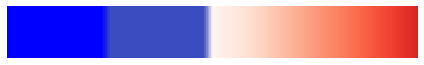

In [70]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=-0.05, maxval=0.7, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, -0.05, 0.7)

#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = 25 #int((128*2)-np.round(255*(1.-0.90))) #231
second = 25 #(256-first) #25
#colors2 = new_cmap(np.linspace(0, 1, first))
colors1 = plt.cm.winter(np.linspace(-0.05, -0.03, first/2))
colors2 = plt.cm.coolwarm(np.linspace(-0.03, 0, first/2))
# colors3 = plt.cm.coolwarm_r(np.linspace(0, 0.3, second/2))
colors4 = plt.cm.Reds(np.linspace(0, 0.7, second))
#colors4 = plt.cm.pink(np.linspace(0.9, 1., second))
# combine them and build a new colormap
# cols = np.vstack((colors1,colors2,colors3,colors4))
cols = np.vstack((colors1,colors2,colors4))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()


plt.show()

In [71]:
# The above code is a custom colormap which is based on the Code from this github repo:
# https://github.com/NeuroanatomyAndConnectivity/gradient_analysis/blob/master/03_visualize_embeddings.ipynb
# However, the code has been modified for the red-blue color scheme.

In [75]:
i = 3 # again, this 'i' value represents a random subject. See similar comments above. 

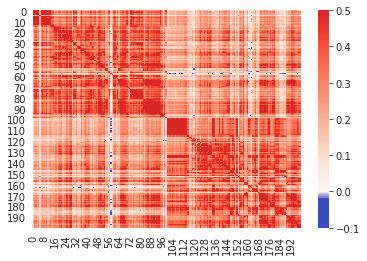

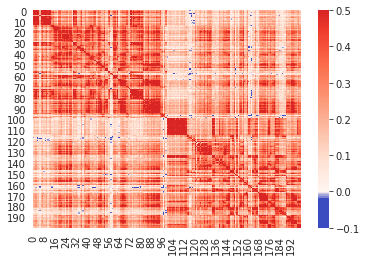

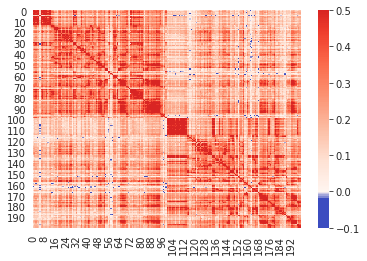

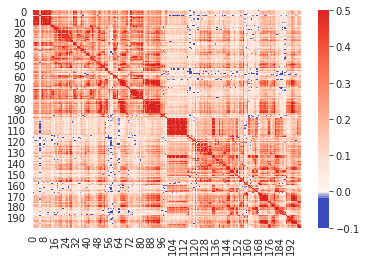

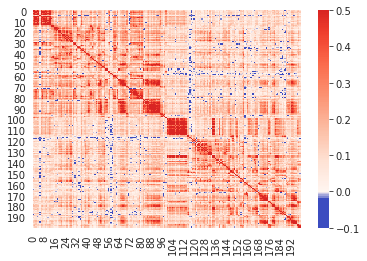

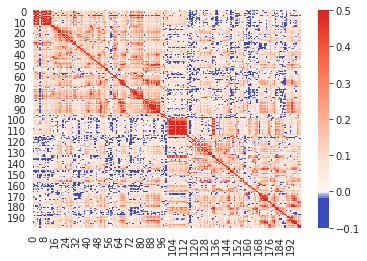

In [79]:
for j in range(6): # here, 'j' loops through the 6 diffrent lambda values. 
    fig, ax = plt.subplots()
    sns.heatmap(All_subs_all_trails[i][j],cmap=mymap,center=0,vmax=0.5,vmin=-0.1) # alter vmax/vmin for better viz as needed. 

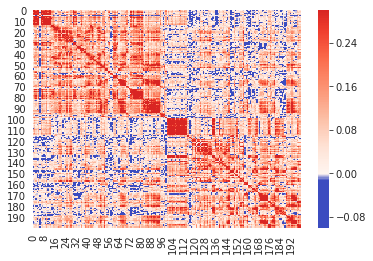

In [80]:
sns.heatmap(All_subs_all_trails[3][5], cmap=mymap, center=0,vmax=0.3,vmin=-0.1) # playing around with vmax here. 

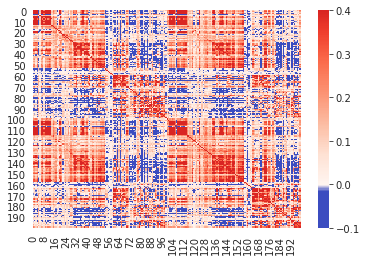

In [82]:
sns.heatmap(all_subs_FC[i],cmap=mymap,center=0,vmax=0.4,vmin=-0.1) # this is the empirical heatmap for the same subject (i=3)